Summary Statistics & Missing Value Report

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/benin-malanville.csv", parse_dates=["Timestamp"])

df.describe()

missing = df.isna().sum()
missing[missing > 0]


Comments    525600
dtype: int64

Outlier Detection & Cleaning

In [4]:
from scipy.stats import zscore

cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[cols_to_check].apply(zscore)

outliers = (z_scores.abs() > 3)
df_clean = df[~outliers.any(axis=1)].copy()

# Impute missing values with median
df_clean.fillna(df_clean.median(numeric_only=True), inplace=True)

# Export cleaned CSV
df_clean.to_csv("data/benin_clean.csv", index=False)


Time Series Analysis

Matplotlib is building the font cache; this may take a moment.


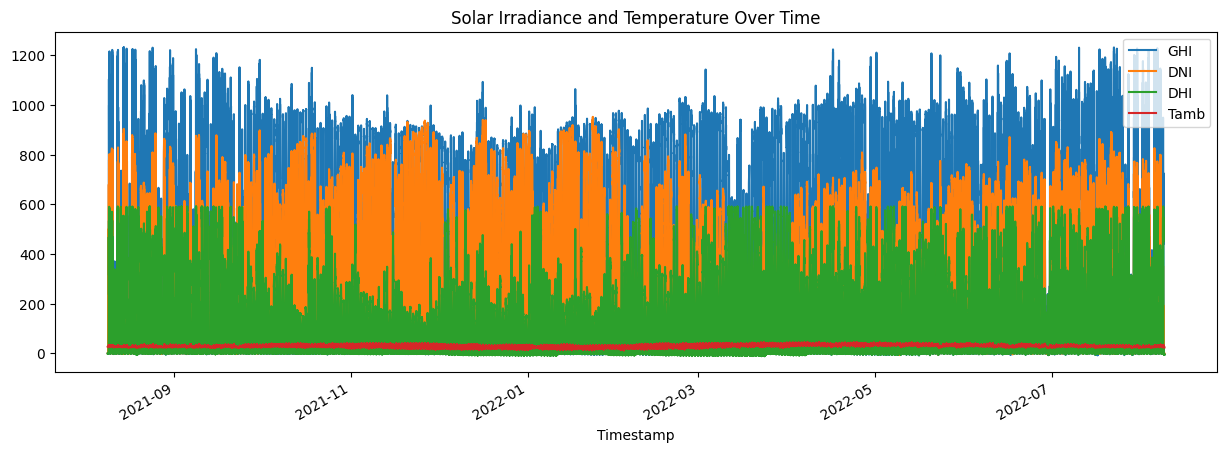

In [5]:
import matplotlib.pyplot as plt

df_clean.set_index("Timestamp")[["GHI", "DNI", "DHI", "Tamb"]].plot(figsize=(15,5))
plt.title("Solar Irradiance and Temperature Over Time")
plt.show()


Correlation & Relationships

<Axes: >

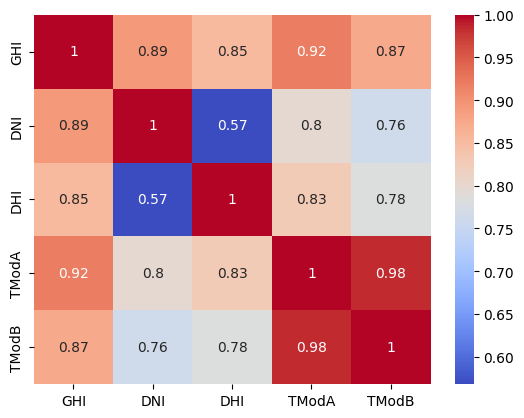

In [6]:
import seaborn as sns
sns.heatmap(df_clean[["GHI", "DNI", "DHI", "TModA", "TModB"]].corr(), annot=True, cmap='coolwarm')


<Axes: xlabel='WS', ylabel='GHI'>

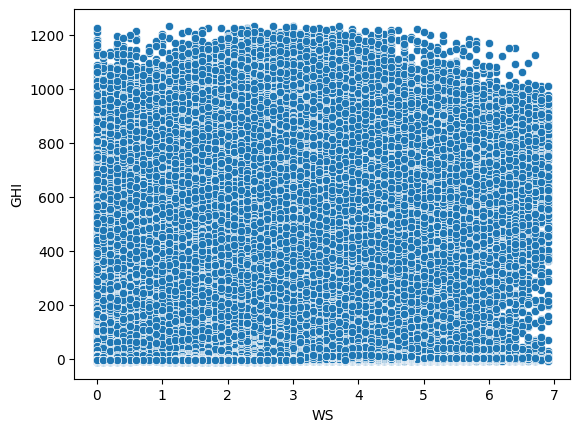

In [7]:
sns.scatterplot(data=df_clean, x='WS', y='GHI')


Wind & Distribution

<Axes: xlabel='GHI', ylabel='Count'>

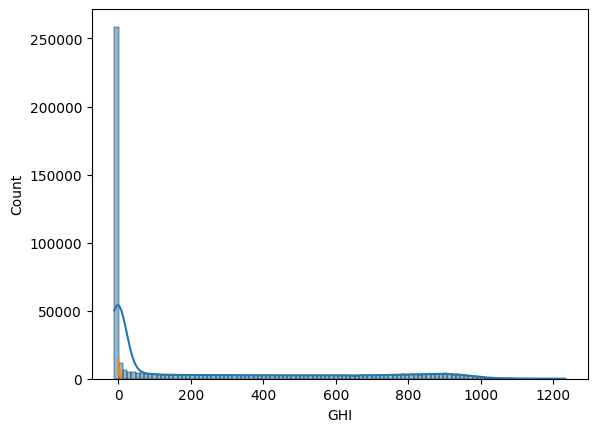

In [8]:
sns.histplot(df_clean['GHI'], kde=True)
sns.histplot(df_clean['WS'], kde=True)


Temperature & RH

<Axes: xlabel='RH', ylabel='Tamb'>

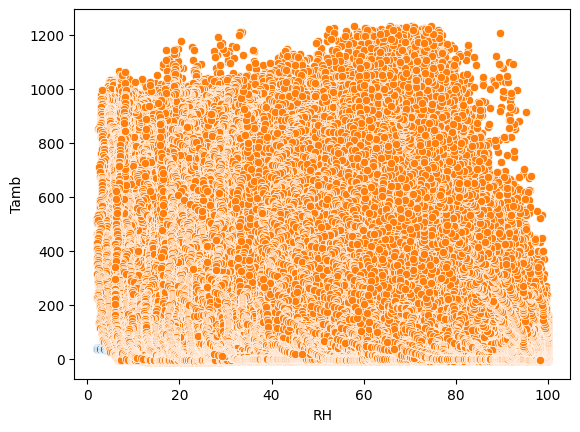

In [9]:
sns.scatterplot(x="RH", y="Tamb", data=df_clean)
sns.scatterplot(x="RH", y="GHI", data=df_clean)
